# 第5回講義 宿題

## 課題. Tensorflowを用いて, MNISTを多層パーセプトロン(MLP)で学習せよ

### 注意

- homework関数を完成させて提出してください
    - 訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます
    - train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
    - test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください
- pred_yのtest_yに対する精度(F値)で評価します
- 全体の実行時間がiLect上で60分を超えないようにしてください
- homework関数の外には何も書かないでください (必要なものは全てhomework関数に入れてください)
- 解答提出時には Answer Cell の内容のみを提出してください

- CNNは使わないでください

**`tf` の以下のモジュールはこの回では使用できないように制限されています. 注意してください.**
```python
tf.app
tf.compat
tf.contrib
tf.erros
tf.gfile
tf.graph_util
tf.image
tf.layers
tf.logging
tf.losses
tf.metrics
tf.python_io
tf.resource_loader
tf.saved_model
tf.sdca
tf.sets
tf.summary
tf.sysconfig
tf.test
tf.train
```

次のセルのhomework関数を完成させて提出してください

# Answer Cell

In [8]:
def homework(train_X, train_y, test_X):
    # WRITE ME!
    import time
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #definition
    
    eps=0.1
    #epoch_num=60
    rng = np.random.RandomState(1234)
    random_state = 42
    
    x = tf.placeholder(tf.float32, [None, 784])
    t = tf.placeholder(tf.float32, [None, 10])
    
    w1 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(784, 100)).astype('float32'), name='w1')
    b1 = tf.Variable(tf.zeros(100), name='b1')
    
    w2 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(100, 50)).astype('float32'), name='w2')
    b2 = tf.Variable(tf.zeros(50), name='b2')
    
    w3 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(50, 10)).astype('float32'), name='w3')
    b3 = tf.Variable(tf.zeros(10), name='b3')
    
    params = [w1, b1, w2, b2, w3, b3]
    
    #forward
    
    u1 = tf.matmul(x,w1)+b1
    z1 = tf.nn.sigmoid(u1)
    
    u2 = tf.matmul(z1,w2)+b2
    z2 = tf.nn.sigmoid(u2)
    
    u3 = tf.matmul(z2,w3)+b3
    z3 = tf.nn.softmax(u3)
    
    y=z3
    
    # Step3. 誤差関数の定義
    #cost = -tf.reduce_mean(tf.reduce_sum(t*tf.log(y)))
    # tf.log(0)によるnanを防ぐ
    cost = -tf.reduce_mean(tf.reduce_sum(t*tf.log(tf.clip_by_value(y, 1e-10, 1.0)),axis=1))
    #cost = -np.log(y[0,np.nonzero(t)])
    
    #delta
    gw1, gb1, gw2, gb2, gw3, gb3 = tf.gradients(cost, params)
    updates = [
        w1.assign_add(-eps*gw1), # 勾配降下法
        b1.assign_add(-eps*gb1),
        w2.assign_add(-eps*gw2), # 勾配降下法
        b2.assign_add(-eps*gb2),
        w3.assign_add(-eps*gw3), # 勾配降下法
        b3.assign_add(-eps*gb3),
    ]

    train = tf.group(*updates)
    
    valid = tf.argmax(y, 1)
    
    start_time=time.time()
    
    #Online learning
    
    #cost_plt =[]
    #sess = tf.Session()
    #sess.run(tf.global_variables_initializer()) # 重みの初期化
    #for epoch in range(epoch_num):
    #    cost_arry = []
    #    for x_in, y_in in zip(train_X, train_y):
    #        x_in = x_in.reshape(1,len(x_in))
    #        y_tmp = np.zeros(10).reshape(1, 10)
    #        y_tmp[0,y_in] = 1.0
    #        y_in=y_tmp
    #        _cost, _ = sess.run([cost, train], feed_dict={x: x_in, t: y_in})
    #        cost_arry.append(_cost)
    #        
    #    cost_plt.append(np.sum(cost_arry))
    #    tttttt = time.time() - start
    #    print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
        #print(cost_plt)
    #plt.plot(cost_plt)
    
    #batch learning
    n_epochs = 300
    batch_size = 100
    n_batches = train_X.shape[0] // batch_size
    
    nb_classes = 10                                #train_y one-hot
    targets = train_y.reshape(-1)
    one_hot_targets = np.eye(nb_classes)[targets]
    train_y = one_hot_targets
    
    # Step5. 学習
    cost_plt =[]
    with tf.Session() as sess:
        print("start time",start_time)
        sess.run(tf.global_variables_initializer())
        for epoch in range(n_epochs):
            train_X, train_y = shuffle(train_X, train_y, random_state=random_state)
            cost_arry = []
            for i in range(n_batches):
                start = i * batch_size
                end = start + batch_size
                _cost, _ = sess.run([cost,train], feed_dict={x: train_X[start:end], t: train_y[start:end]})
                cost_arry.append(_cost)
                
            cost_plt.append(np.sum(cost_arry))
            tttttt = time.time()-start_time
            #predict
            print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
        pred_y = sess.run(valid, feed_dict={x: test_X})
        print(time.time()-start_time)
        plt.plot(cost_plt)
    
    # Step6. 予測
    #pred_y = np.argmax(sess.run(y, feed_dict={x: test_X}),1)

    #sess.close()
    
    
    
    return pred_y

- 以下のvalidate_homework関数を用いてエラーが起きないか動作確認をして下さい。
- 提出に際して、以下のscore_homework関数で60分で実行が終わることを確認して下さい。
- 評価は以下のscore_homework関数で行われますが、random_stateの値は変更されます。

# Checker Cell (for student)

In [9]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf


def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:1000]
    train_y_mini = train_y[:1000]
    test_X_mini = test_X[:1000]
    test_y_mini = test_y[:1000]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))

start time 1494686526.321419
epoch 0 time 0.2755117416381836 cost 23.049
epoch 1 time 0.31070828437805176 cost 22.9837
epoch 2 time 0.3263242244720459 cost 22.9917
epoch 3 time 0.35721516609191895 cost 22.9766
epoch 4 time 0.3788623809814453 cost 22.9721
epoch 5 time 0.4261753559112549 cost 22.9841
epoch 6 time 0.5052967071533203 cost 22.9738
epoch 7 time 0.5353395938873291 cost 22.9618
epoch 8 time 0.5951194763183594 cost 22.9671
epoch 9 time 0.678790807723999 cost 22.9695
epoch 10 time 0.7319478988647461 cost 22.9739
epoch 11 time 0.7619924545288086 cost 22.9481
epoch 12 time 0.795008659362793 cost 22.9631
epoch 13 time 0.8763680458068848 cost 22.9478
epoch 14 time 0.9410252571105957 cost 22.9507
epoch 15 time 0.9821336269378662 cost 22.9528
epoch 16 time 1.0152854919433594 cost 22.9516
epoch 17 time 1.0550963878631592 cost 22.9374
epoch 18 time 1.0805208683013916 cost 22.942
epoch 19 time 1.1273467540740967 cost 22.9341
epoch 20 time 1.1661121845245361 cost 22.9051
epoch 21 time 1.1

epoch 187 time 6.164099216461182 cost 6.31889
epoch 188 time 6.189266681671143 cost 6.26323
epoch 189 time 6.211300611495972 cost 6.22317
epoch 190 time 6.2383410930633545 cost 6.20422
epoch 191 time 6.260374069213867 cost 6.13344
epoch 192 time 6.282928943634033 cost 6.09823
epoch 193 time 6.303476333618164 cost 6.05577
epoch 194 time 6.325146436691284 cost 6.0174
epoch 195 time 6.347179651260376 cost 5.97062
epoch 196 time 6.3717241287231445 cost 5.9357
epoch 197 time 6.394566059112549 cost 5.87372
epoch 198 time 6.423374652862549 cost 5.84207
epoch 199 time 6.545874357223511 cost 5.7982
epoch 200 time 6.591282844543457 cost 5.76283
epoch 201 time 6.616319417953491 cost 5.71797
epoch 202 time 6.6526196002960205 cost 5.67566
epoch 203 time 6.675163269042969 cost 5.63137
epoch 204 time 6.7155773639678955 cost 5.5906
epoch 205 time 6.7839601039886475 cost 5.54954
epoch 206 time 6.82528281211853 cost 5.52017
epoch 207 time 6.845373153686523 cost 5.47266
epoch 208 time 6.915632724761963 c

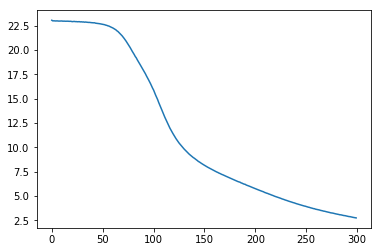

In [10]:
validate_homework()
#score_homework()

start time 1494686538.3141868
epoch 0 time 4.4780333042144775 cost 1285.08
epoch 1 time 6.815724849700928 cost 1090.26
epoch 2 time 8.374126434326172 cost 595.346
epoch 3 time 10.768674612045288 cost 370.348
epoch 4 time 13.739470720291138 cost 290.178
epoch 5 time 17.729554414749146 cost 248.096
epoch 6 time 19.09781527519226 cost 220.673
epoch 7 time 21.112181186676025 cost 201.621
epoch 8 time 24.434876680374146 cost 187.082
epoch 9 time 29.269721746444702 cost 174.951
epoch 10 time 33.926270484924316 cost 164.482
epoch 11 time 38.162578105926514 cost 155.08
epoch 12 time 42.83657884597778 cost 146.297
epoch 13 time 47.403119802474976 cost 138.417
epoch 14 time 51.60737657546997 cost 130.805
epoch 15 time 55.32478046417236 cost 123.975
epoch 16 time 57.662930965423584 cost 117.584
epoch 17 time 59.79977750778198 cost 111.971
epoch 18 time 62.8772873878479 cost 106.451
epoch 19 time 67.25136399269104 cost 101.785
epoch 20 time 71.13779830932617 cost 97.2867
epoch 21 time 75.826728820

epoch 179 time 650.0146250724792 cost 3.83051
epoch 180 time 651.4888846874237 cost 3.78114
epoch 181 time 653.3437702655792 cost 3.73916
epoch 182 time 654.845755815506 cost 3.68839
epoch 183 time 657.9144983291626 cost 3.63115
epoch 184 time 660.4416308403015 cost 3.59287
epoch 185 time 662.8635938167572 cost 3.54752
epoch 186 time 665.081960439682 cost 3.50517
epoch 187 time 666.998162984848 cost 3.46994
epoch 188 time 669.4763793945312 cost 3.41545
epoch 189 time 672.3095853328705 cost 3.36876
epoch 190 time 675.6917490959167 cost 3.34889
epoch 191 time 679.1304092407227 cost 3.29665
epoch 192 time 682.668395280838 cost 3.2557
epoch 193 time 685.8650722503662 cost 3.22256
epoch 194 time 689.6377100944519 cost 3.18342
epoch 195 time 693.3410720825195 cost 3.1446
epoch 196 time 696.3292427062988 cost 3.11574
epoch 197 time 698.4088003635406 cost 3.07596
epoch 198 time 701.9495975971222 cost 3.03619
epoch 199 time 705.4728584289551 cost 3.00584
epoch 200 time 708.291501045227 cost 2.9

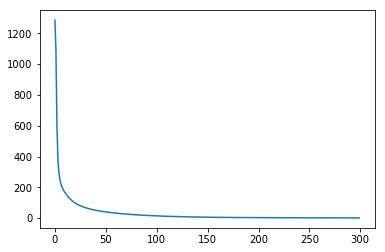

In [11]:
score_homework()